#3. Free fall with air resistance: *solving a 2nd order ODE*
=========
The motion of an object falling under the influence of gravity and air resistance can be modeled
by the following second-order ODE:
\begin{equation} 
m\frac{d^2x}{dt^2} = mg - c \left (\frac{dx}{dt} \right )^2
\end{equation}

where m = 70 kg is the mass of the object, $g = 9.81 \, m/s^2$
is the gravitational acceleration, and c = 0.25
kg/m is the drag coefficient.
* Converting the 2nd order ODE is a system of two 1st order ODEs, write a Python script to solve the
system of ODEs using the ***Euler*** and/or ***Runge-Kutta (RK4)*** methods. Use initial conditions
$x(0) = 0 m$ and $v(0) = 0 m/s$ for an object starting from rest.
* Plot the position $x(t)$ and velocity $v(t)$ of the object over time.
* Analyze the terminal velocity $v_{term}$ and how the solution behaves when air resistance becomes
significant

In [52]:
## Imports
import numpy as np 
import matplotlib.pyplot as plt

#Define plotting config
def show_plot(title, xlabel, ylabel): 
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()  

To begin our numerical solution we split the equation into two first order ODEs, giving us our $f_1(t, x, v)$ and $f_2(t, x, v)$:

\begin{gather}
\frac{dx}{dt} = v = f_1(t, x, v)\\
\frac{dv}{dt} = g - \frac{cv^2}{m} = f_2(t, x, v)
\end{gather}

In [53]:
#defining constants and functions
m = 70 #kg
g = 9.81 #m/s^2
c = 0.25 #kg/m
start_x = 0 #m
start_v = 0 #m/s
start_t = 0 #s
trg_t = 30 #s
step = 2 #s

# since neither function depends on t or x, we can simplify the lambdas to only take one argument
f1 = lambda v : v
f2 = lambda v : g - ((c*(v**2))/m)
t_array = np.arange(start_t, trg_t + step, step)

In [54]:

def iter_over_two_eq_system(slopes):
    """
    Generalized iteration over two functions that are incremented in small steps. This is particularly for a second order ODE that is split into two first order ODEs. 
    :param slopes: tuple of functions f_1 and f_2
    :return: tuple of x-values and v-values
    """ 
    slope1 = slopes[0]
    slope2 = slopes[1]
    x_array = []
    v_array = []
    current_x = start_x
    current_v = start_v

    for t in t_array:
        x_array.append(current_x)
        v_array.append(current_v)

        #define temp variables to make sure the correct value is used. Not necessary in this case but if slope2 was dependent on x, we wouldn't want to use x_{n+1}.
        tmp_x = current_x + slope1(current_v) 
        tmp_v = current_v + slope2(current_v)

        current_x, current_v = tmp_x, tmp_v

    return x_array, v_array

Now with everything predefined, let us compare the different methods! With the $f_1(x, v)$ and $f_2(x, v)$ defined above, we get the corresponding steps with Euler's method:
\begin{gather}
x_{n+1} = x_n + hf_1(t_n, x_n, v_n) \\
v_{n+1} = v_n + hf_2(t_n, x_n, v_n) \\
hf_1(t, x, v) = hv_n \\
hf_2(t, x, v) = h \left (g - \frac{cv_n^2}{m} \right ) 
\end{gather}

Similarly for RK2, we get the following system of equations:
\begin{gather}
x_{n+1} = x_n +k_2^x \\
v_{n+1} = v_n +k_2^v \\
k_1^x = hv_n \\
k_1^v = h\left(g - \frac{cv_n^2}{m}\right) \\
k_2^x = h\left(v_n + \frac{k_1^v}{2}\right) \\
k_2^v = h \left[ g - \frac{c\left(v_n+ \frac{k_1^v}{2}\right)^2}{m} \right] \\
\end{gather}

RK4 works on the same principle, but to not fill the page with clutter I will only show a generalized example of a first order ODE $\frac{dy}{dt} = f(t, y)$:
\begin{gather}
y_{n+1} = y_n + \frac{1}{6} \left(k_1 + 2k_2 + 2k_3 + k_4 \right) \\
k_1 = hf(t_n, y_n) \\
k_2 = hf\left(t_n+\frac{h}{2}, y_n + \frac{k_1}{2}\right) \\
k_3 = hf\left(t_n+\frac{h}{2}, y_n + \frac{k_2}{2}\right) \\
k_4 = hf\left(t_n+\frac{h}{2}, y_n + k_3\right) \\
\end{gather}

In [55]:
#Defining the increments used for each method
def euler():
    euler1 = lambda v: step * f1(v) 
    euler2 = lambda v: step * f2(v)
    return euler1, euler2
    
def rk2():
    k1x = lambda v: step * f1(v)
    k1v = lambda v: step * f2(v)

    k2x = lambda v: step * f1(v + (k1v(v)/2)) 
    k2v = lambda v: step * f2(v + (k1v(v)/2)) 
    return k2x, k2v

def rk4():
    k1x = lambda v: step * f1(v)
    k1v = lambda v: step * f2(v)

    k2x = lambda v: step * f1(v + (k1v(v)/2)) 
    k2v = lambda v: step * f2(v + (k1v(v)/2)) 

    k3x = lambda v: step * f1(v + (k2v(v)/2)) 
    k3v = lambda v: step * f2(v + (k2v(v)/2)) 

    k4x = lambda v: step * f1(v + (k3v(v))) 
    k4v = lambda v: step * f2(v + (k3v(v))) 

    rk_slope_x = lambda v: (1/6) * (k1x(v) + 2*k2x(v) + 2*k3x(v) + k4x(v))
    rk_slope_v = lambda v: (1/6) * (k1v(v) + 2*k2v(v) + 2*k3v(v) + k4v(v))
    return rk_slope_x, rk_slope_v

In [56]:
def terminal_velocity():
    return np.sqrt(m*g/c)

def theoretic(t): #http://www.hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/quadvfall.html
    v_t = terminal_velocity()
    tau = v_t/g

    #simplified since v_0 = 0 and t_0 = 0
    position = tau * v_t * np.log(np.cosh(t/tau))
    velocity = v_t * np.tanh(t/tau)
    return position, velocity


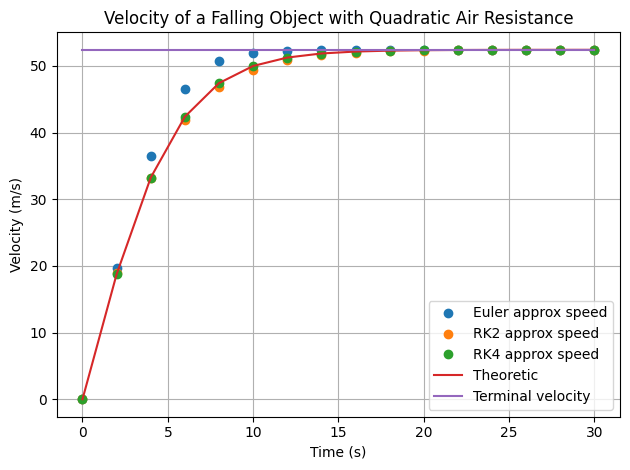

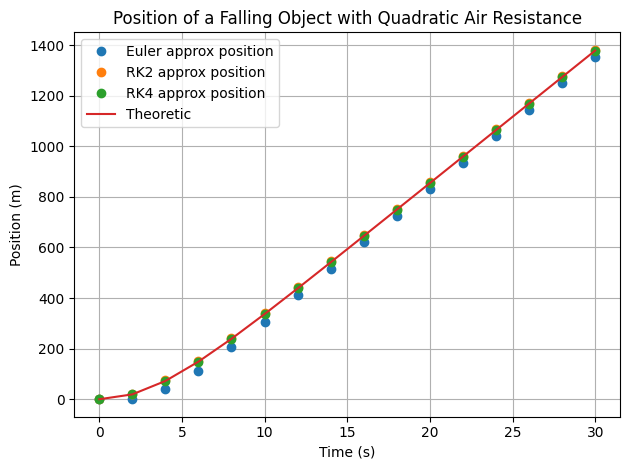

In [57]:
plt.figure(1)
plt.plot(t_array, iter_over_two_eq_system(euler())[1], "o", label="Euler approx speed")  
plt.plot(t_array, iter_over_two_eq_system(rk2())[1], "o", label="RK2 approx speed")  
plt.plot(t_array, iter_over_two_eq_system(rk4())[1], "o", label="RK4 approx speed")  
plt.plot(t_array, np.vectorize(lambda t : theoretic(t)[1])(t_array), "-", label="Theoretic")
plt.plot(t_array, np.vectorize(lambda _ : terminal_velocity())(t_array), "-", label="Terminal velocity")
show_plot("Velocity of a Falling Object with Quadratic Air Resistance",
          "Time (s)",
          "Velocity (m/s)")

plt.figure(2)
plt.plot(t_array, iter_over_two_eq_system(euler())[0], "o", label="Euler approx position")  
plt.plot(t_array, iter_over_two_eq_system(rk2())[0], "o", label="RK2 approx position")  
plt.plot(t_array, iter_over_two_eq_system(rk4())[0], "o", label="RK4 approx position")  
plt.plot(t_array, np.vectorize(lambda t : theoretic(t)[0])(t_array), "-", label="Theoretic")
show_plot("Position of a Falling Object with Quadratic Air Resistance",
          "Time (s)",
          "Position (m)")